<a href="https://colab.research.google.com/github/Leeladewa/machine_learning_practices/blob/master/TensorflowTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% tensorflow_version 1x

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1x`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow.python.framework import ops
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.15.2


In [4]:
Y_hat = tf.constant(36, name='Y_hat')
y = tf.constant(39, name='y')
loss = tf.Variable((y-Y_hat)**2, name='loss')
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  print(sess.run(loss))

9


In [5]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
sess = tf.Session()
print(sess.run(c))

20


In [6]:
x = tf.placeholder(tf.int64,shape=None, name='x')
print(sess.run(2*x, feed_dict={x:3}))
sess.close()

6


In [7]:
import numpy as np
print("successful")
def linear_function():
  x = np.random.randn(3,1)
  W = np.random.randn(4,3)
  b = np.random.randn(4,1)
  y = tf.add(tf.matmul(W,x),b)
  sess  = tf.Session()
  print(sess.run(y))
  sess.close()


linear_function()

successful
[[-3.83803994]
 [-3.52527263]
 [-0.65492787]
 [-0.48895749]]


In [8]:
def sigmoid(z):
  x = tf.placeholder(tf.float32, name= 'x')
  sigmoid = tf.sigmoid(x)
  sess = tf.Session()
  result = sess.run(sigmoid, feed_dict = {x:3})
  sess.close()
  return result
print("sigmoid(0) = "+str(sigmoid(0)))
print("sigmoid(12) = "+str(sigmoid(12)))


sigmoid(0) = 0.95257413
sigmoid(12) = 0.95257413


In [9]:
def cost(logits, labels):
  z = tf.placeholder(tf.float32,name = 'z')
  y = tf.placeholder(tf.float32, name = 'y')
  cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
  sess = tf.Session()
  cost = sess.run(cost,feed_dict = {z:logits, y:labels})
  sess.close()
  return cost

logits = np.array([0.2,0.4,0.7,0.9])
cost = cost(logits, np.array([0,0,1,1]))
print("cost = "+str(cost))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
cost = [0.79813886 0.91301525 0.40318605 0.34115386]


In [10]:
def one_hot_matrix(labels, c):
  C = tf.constant(c,name='c')
  one_hot = tf.one_hot(labels, depth=C, axis=1) 
  sess = tf.Session()
  one_hot = sess.run(one_hot)
  sess.close()
  return one_hot

labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, c=4) 
print('one_hot = \n'+str(one_hot)) 

one_hot = 
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [11]:
def ones(shape):
  ones = tf.ones(shape)
  sess = tf.Session()
  ones = sess.run(ones)
  sess.close()
  return ones
print("ones = \n "+str(ones([3])))  

ones = 
 [1. 1. 1.]


In [12]:
def create_placeholder(n_x, n_y):
  X = tf.placeholder(tf.float32,shape=[n_x, None])
  Y = tf.placeholder(tf.float32,shape=[n_y, None])
  return X, Y
X, Y = create_placeholder(12288, 6)
print("X = "+str(X))
print("Y = "+str(Y))  

X = Tensor("Placeholder:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(6, ?), dtype=float32)


In [13]:
def initialize_parameters():
  W1 = tf.get_variable("W1",[35,784], initializer=tf.contrib.layers.xavier_initializer())
  b1 = tf.get_variable("b1",[35,1],initializer=tf.zeros_initializer())
  W2 = tf.get_variable("W2",[20,35], initializer=tf.contrib.layers.xavier_initializer())
  b2 = tf.get_variable("b2",[20,1],initializer=tf.zeros_initializer())
  W3 = tf.get_variable("W3",[10,20], initializer=tf.contrib.layers.xavier_initializer())
  b3 = tf.get_variable("b3",[10,1],initializer=tf.zeros_initializer())
  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2,
                "W3":W3,
                "b3":b3}
  return parameters
tf.reset_default_graph()
with tf.Session() as sess:
  parameters = initialize_parameters()
  print("W1 = " + str(parameters["W1"]))


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(35, 784) dtype=float32_ref>


In [14]:
def forward_propagation(X,parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']
  Z1 = tf.add(tf.matmul(W1,X),b1)
  A1 = tf.nn.relu(Z1)
  Z2 = tf.add(tf.matmul(W2,A1),b2)
  A2 = tf.nn.relu(Z2)
  Z3 = tf.add(tf.matmul(W3,A2),b3)
  return Z3
tf.reset_default_graph()
with tf.Session() as sess:
  X, Y = create_placeholder(784, 10)
  parameters = initialize_parameters()
  Z3 = forward_propagation(X,parameters)
  print("Z3 = "+str(Z3))

Z3 = Tensor("Add_2:0", shape=(10, ?), dtype=float32)


In [15]:
def compute_cost(Z3,Y):
  logits = tf.transpose(Z3)
  labels = tf.transpose(Y)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=labels))
  return cost

tf.reset_default_graph()
with tf.Session() as sess:
  X,Y = create_placeholder(784, 10)
  parameters = initialize_parameters()
  Z3 = forward_propagation(X,parameters)
  cost = compute_cost(Z3, Y)
  print("cost = "+str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [16]:
data = '/content/drive/My Drive/Text_file.txt/mnist_test.csv'
df  = pd.read_csv(data)
X_train = np.array(df.drop(['label'],axis=1))

print(np.shape(X_train))
Y_train = np.array(df['label'])
print(np.shape(Y_train))


Y_train = one_hot_matrix(Y_train,10)


[X_train, X_test, Y_train, Y_test] = train_test_split(X_train,Y_train,test_size = 0.1, random_state = 0)
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

(10000, 784)
(10000,)


In [17]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    import math    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((10,m))
    

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        
        mini_batch_X = shuffled_X[:,mini_batch_size*k:mini_batch_size*(k+1)]
        mini_batch_Y = shuffled_Y[:,mini_batch_size*k:mini_batch_size*(k+1)]
      
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:,0:m-mini_batch_size*num_complete_minibatches]
        mini_batch_Y = shuffled_Y[:,0:m-mini_batch_size*num_complete_minibatches]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

mini_batches = random_mini_batches(X_train, Y_train, 64)
print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))    

shape of the 1st mini_batch_X: (784, 64)
shape of the 2nd mini_batch_X: (784, 64)
shape of the 3rd mini_batch_X: (784, 64)
shape of the 1st mini_batch_Y: (10, 64)
shape of the 2nd mini_batch_Y: (10, 64)
shape of the 3rd mini_batch_Y: (10, 64)
mini batch sanity check: [0 0 0]


In [22]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.0001,num_epochs=1500,minibatch_size=32,print_cost=True):
  ops.reset_default_graph()
  (n_x, m)=X_train.shape
  n_y = Y_train.shape[0]
  costs = []
  X, Y = create_placeholder(n_x, n_y)
  print(X)
  print(Y)
  parameters = initialize_parameters()
  Z3 = forward_propagation(X, parameters)
  cost = compute_cost(Z3, Y)
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      epoch_cost = 0
      num_minibatches = int(m/minibatch_size)
      minibatches = random_mini_batches(X_train, Y_train,64)
      for minibatch in minibatches:
        (minibatch_X ,minibatch_Y) = minibatch
        _, minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X, Y:minibatch_Y})
        epoch_cost += minibatch_cost/minibatch_size

    if print_cost == True and epoch % 100 ==0:
      print('cost after epoch % i : %f' %(epoch,epoch_cost)) 
    if print_cost == True and epoch % 5==0:
      costs.append(epoch_cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iteration(per fives)')
    plt.title("learning_rate = "+str(learning_rate))
    plt.show()

    parameters = sess.run(parameters)
    print("parameters have been Trained !!!!!")
    correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Train Accuracy : ",accuracy.eval({X:X_train, Y:Y_train}))
    print("Test Accuracy : ", accuracy.eval({X:X_test,Y:Y_test}))
    return parameters    

     

Tensor("Placeholder:0", shape=(784, ?), dtype=float32)
Tensor("Placeholder_1:0", shape=(10, ?), dtype=float32)


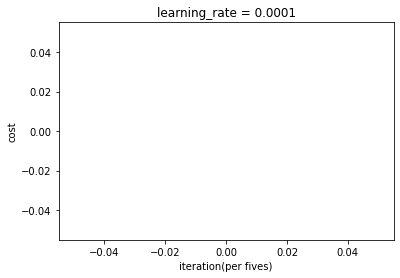

parameters have been Trained !!!!!
Train Accuracy :  1.0
Test Accuracy :  0.92


In [23]:
parameter = model(X_train, Y_train, X_test,Y_test)